# Introduction

Titanic disaster in one of the deadliest disasters in history. Among more than 2,000 passengers and crew aboard, more than 1,500 people died. If you have watched the movie "Titanic", you may be familiar with the disater. 

There are not enought lifeboats aboard, which causes the huge amount of death. Therefore, being in the lifeboats is the key to survive. In the movie, people tend to send women and children to lifeboats and let them survive, but is it true in the real life? 

"titanic_data.csv" contains titanic passengers' information, including their name, age, sex and so on. Most importantly, it shows whether they have survived or not. The following questions can be answered based on this dataset:

* Are women more likely to survive than men?
* Are kids more likely to survive than others?
* Are 1st class people more likely to survive than others?
* When combining all factors together, which kind of people are more likely to survive?



## Data Notes:

### Data Dictionary

|Variable|Definition|Key|
|:---|:---|:---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||	
|Age|Age|in years|	
|sibsp|# of siblings / spouses aboard the Titanic||	
|parch|# of parents / children aboard the Titanic||	
|ticket|Ticket number||	
|fare|Passenger fare||	
|cabin|Cabin number||	
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes

pclass: A proxy for socio-economic status (SES)

* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way

* Sibling = brother, sister, stepbrother, stepsister

* Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

To start with the analysis, I need to import necessary liabraries first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
original_data = pd.read_csv('titanic_data.csv')
original_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
original_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Wrangling

Passengers names and Ticket number is not very helpful for my questions. I will remove them from the dataset
to make the table look better.

In [5]:
titanic = original_data.drop(['Ticket', 'Name'], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


There are some NaN under column Cabin. After checking the dataset documentation, I do not think Cabin number
is very helpful for my analysis, either. I will drop it as well.

In [6]:
titanic.drop('Cabin', axis = 1, inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Since I only select the top 5 rows of the data, there might be some hidden NaN within the table. 
I will check if there are NaN, and drop the rows if necessary.

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

There are 177 ages missing from our dataset. It will be very hard to predict the ages. 
We have 891 rows in total, so deleting 177 (20% of the dataset) may affect our analysis.
To compromise this situation, I will use the table with NaN on age column for analysis that is not related to age.
The 2 NaN under Embarked column will not influence, so I will drop it directly.

In [8]:
titanic = titanic.dropna(subset = ['Embarked'])
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Get the table for analysis related to age.

In [9]:
titanic_age_analysis = titanic.dropna()
titanic_age_analysis.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Before dive into the analysis, and seperate the table based on catogories, it is better to take a look at the data as a whole. After learning about the big picture, it will be easier to find the direction to do following analysis.

In this dataset, it is a good idea to learn about the number of survials, and the number of non-survivals.

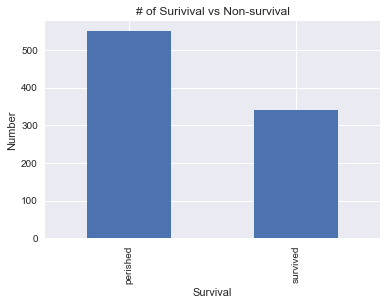

In [10]:
fig, ax = plt.subplots()
titanic['Survived'].value_counts().plot(kind = 'bar')
ax.set_xlabel('Survival')
ax.set_ylabel('Number')
ax.set_xticklabels(['perished', 'survived'])
ax.set_title('# of Surivival vs Non-survival')

My first two questions are comparing two criteria of this dataset, so I will write a function to do this. 

In [11]:
def compare_two_criteria(data, group, criteria1, criteria2):
    
    '''
    This function will calculate the percentage of survival for each critera, and draw a plot
    
    Parameters:
    ---
    data: the dataset
    group: which cololumn to groupby, must be a column of the dataset
    criteria1: one of the value of the column
    criteria2: the other one of the value of the column
    ---
    
    Return:
    ---
    None. 
    Print:
    The percentage of survival of each criteria vs. overall percentage of survival
    The stacked bar plot for each criteria
    ---
    '''
    
    # get the total amount per group
    total_group1 = data[data[group] == criteria1].count()[group]
    total_group2 = data[data[group] == criteria2].count()[group]
    
    # get the total survived people per group
    group_by_criteria = data.groupby(group).sum()['Survived']
    group1_survive = group_by_criteria[criteria1]
    group2_survive = group_by_criteria[criteria2]
    
    # get the total not survived people per group
    
    group1_not_survive = total_group1 - group1_survive
    group2_not_survive = total_group2 - group2_survive
    
    # group data togethe for plot
    x = ['survived', 'not survived']
    y_group1 = [group1_survive, group1_not_survive]
    y_group2 = [group2_survive, group2_not_survive]
    
    # get percentage information and format the number
    
    group1_survival_rate = "{:.0%}".format(group1_survive / (group1_survive + group2_survive))                                   
    group2_survival_rate = "{:.0%}".format(group2_survive / (group1_survive + group2_survive)) 
    total_survival_rate = '{:.0%}'.format((group1_survive + group2_survive) / (total_group1 + total_group2))
    
    # print the survival rate for each group and compare to the overall rate
    
    print(str(criteria1) + ' survival rate: ' + group1_survival_rate + 
          ' vs. total survival rate: ' + total_survival_rate  )
    print(str(criteria2) + ' survival rate: ' + group2_survival_rate + 
          ' vs. total survival rate: ' + total_survival_rate)
    
    # set up the plot
    fig, ax = plt.subplots(figsize = (6, 6))
    
    location = [0, 1]
    
    # draw the plot for group 1 
    
    ax.bar(location, y_group1, label = criteria1, color = 'red')
    
    # add number information
    
    for i, v in enumerate(y_group1):
        ax.text(i - 0.1, v , str(y_group1[i]), fontsize = 18)
        
    # draw the plot and add percentage information for group2
    
    ax.bar(location, y_group2, label = criteria2, bottom = y_group1)
    
    for i, v in enumerate(y_group2):
        ax.text(i - 0.1, (v + y_group1[i]), str(y_group2[i]), fontsize = 18)
        
    # To make the plot look better
    
    ax.legend(loc = 2)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['survived', 'perished'])
    ax.set_title(str(criteria1 + ' vs. ' + criteria2))

We can use the function now to compare the chances of survival between male and female

female survival rate: 68% vs. total survival rate: 38%
male survival rate: 32% vs. total survival rate: 38%


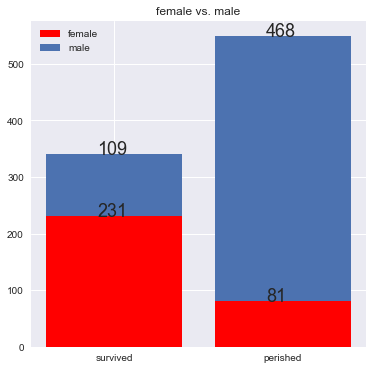

In [12]:
compare_two_criteria(titanic, 'Sex', 'female', 'male')

The above plot solved the first question. Female are more likely to survive than male. Given that fact that female only occupied 35% of the total people. Among all the people who survived, 67% are female. Among all the people who did not survive, only 14% are female. 

To check whether 'Sex' causes a significant difference, I need to run a statistical test, specifically, Chi-Square test for it. To be able to check other factors as well, I am going to write a fundtion.

In [13]:
def chi_square_test(x, y):
    
    '''
    This function will compute the frequency table of x and y, and print out the chi-square
    statistical test results.
    
    Parameters:
    ---
    x, y: pandas Series, must be the same shape
    ---
    
    Return:
    ---
    None.
    Print out the frequency table, chi square and p-value
    ---
    '''
    
    table = pd.crosstab(x, y)
    print('Frequency Table:')
    print('----------------------')
    print(table)
    print('----------------------')
    chi, pval, ddof, expected = stats.chi2_contingency(table)
    print("\n")
    print("Chi Square Value is: ", chi)
    print("p-value is: ", pval)

In [14]:
chi_square_test(titanic.Survived, titanic.Sex)

Frequency Table:
----------------------
Sex       female  male
Survived              
0             81   468
1            231   109
----------------------


Chi Square Value is:  258.426610446
p-value is:  3.77990966656e-58


Since the p-value is smaller than 0.01, we can say 'Sex' and 'Survived' is not independent. The survived rate is influenced by sex of passengers. 

We can apply the same procedure to test if kids are more likely to survive than adults. I define kids are people under 12 years old. To get information about whether they are kids or not, I need to update the table first. 
I need to use titanic_age_analysis table since this analysis is related to ages.

In [15]:
def child_or_not(age):
    
    if age < 12:
        return 'child'
    else:
        return 'adult'
    
titanic_age_analysis['child_or_adult'] = titanic_age_analysis['Age'].apply(child_or_not)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


After analyzing the data by gender, we can start to analyze this dataset by age. Let's take a look at the age distribution first, so that we can learn about which age group of people were mostly in Titanic. 

Let's take a quick look at the age distribution before detailed analysis.

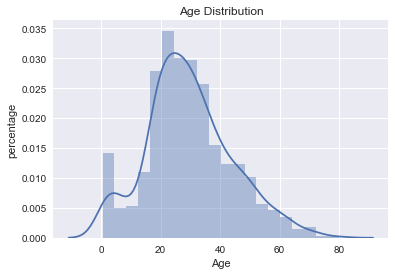

In [16]:
ax = sns.distplot(titanic_age_analysis['Age'])
ax.set_ylabel('percentage')
ax.set_title('Age Distribution')

In [17]:
titanic_age_analysis.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,child_or_adult
0,1,0,3,male,22.0,1,0,7.2500,S,adult
1,2,1,1,female,38.0,1,0,71.2833,C,adult
2,3,1,3,female,26.0,0,0,7.9250,S,adult
3,4,1,1,female,35.0,1,0,53.1000,S,adult
4,5,0,3,male,35.0,0,0,8.0500,S,adult


child survival rate: 14% vs. total survival rate: 40%
adult survival rate: 86% vs. total survival rate: 40%


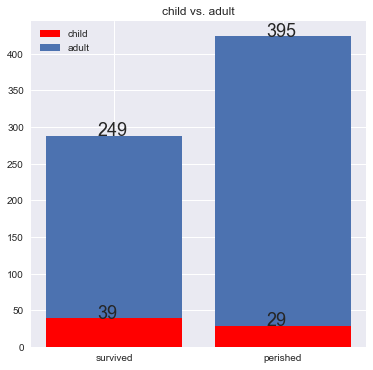

In [18]:
compare_two_criteria(titanic_age_analysis, 'child_or_adult', 'child', 'adult')

In [19]:
chi_square_test(titanic_age_analysis.Survived, titanic_age_analysis.child_or_adult)

Frequency Table:
----------------------
child_or_adult  adult  child
Survived                    
0                 395     29
1                 249     39
----------------------


Chi Square Value is:  8.15884163003
p-value is:  0.0042851732305


The p-value is less than 0.05, which is a normal significance level., but higher than 0.01. Therefore, whether passenger is kids or not will influence whether they will survive or not, but it is not as significant influence as 'Sex'. 

Per the frequency table, children are more likly to survive than adults.

In [20]:
def first_class(pclass):
    if pclass == 1:
        return '1st_class'
    else:
        return 'not_1st_class'
    
titanic_class_analysis = titanic.copy()
titanic_class_analysis['1st_class_or_not'] = titanic_class_analysis['Pclass'].apply(first_class)
titanic_class_analysis.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1st_class_or_not
0,1,0,3,male,22.0,1,0,7.2500,S,not_1st_class
1,2,1,1,female,38.0,1,0,71.2833,C,1st_class
2,3,1,3,female,26.0,0,0,7.9250,S,not_1st_class
3,4,1,1,female,35.0,1,0,53.1000,S,1st_class
4,5,0,3,male,35.0,0,0,8.0500,S,not_1st_class


1st_class survival rate: 39% vs. total survival rate: 38%
not_1st_class survival rate: 61% vs. total survival rate: 38%


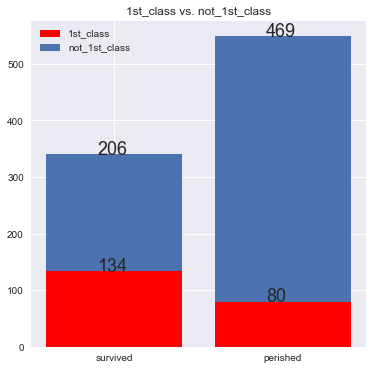

In [21]:
compare_two_criteria(titanic_class_analysis, '1st_class_or_not', '1st_class', 'not_1st_class')

In [22]:
chi_square_test(titanic_class_analysis.Survived,titanic_class_analysis['1st_class_or_not'])

Frequency Table:
----------------------
1st_class_or_not  1st_class  not_1st_class
Survived                                  
0                        80            469
1                       134            206
----------------------


Chi Square Value is:  69.528856124
p-value is:  7.53047039089e-17


1st class people count on 26% of the total passengers, but they are 42% of the total survival, and only 15% of dead people. Also, the p-value is significant smaller than the significance rate 0.05 or 0.01. Therefore, whether passengers are 1st class or not will influence whether they will survive.

Based on the analysis, we can see that 'Sex' and '1st' class has significant influence on whether people will survive or not. Since 'Age' is not significant on significance leverl 0.01, I will focus on the combination of 'Sex' and '1st class' together.

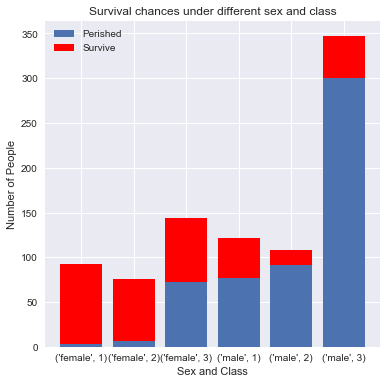

In [23]:
# Add a new 'Dead' column, so it will easier to count how many people are dead

sex_class = titanic_class_analysis.copy()
sex_class['Dead'] = np.where(sex_class['Survived'] == 0, 1, 0)

# create a new DataFrame that group by sex and pclass
survive = sex_class[['Sex','Pclass', 'Survived']].groupby(
    ['Sex', 'Pclass']).sum()

dead = sex_class[['Sex','Pclass', 'Dead']].groupby(
    ['Sex', 'Pclass']).sum()

# draw the plot
fig, ax = plt.subplots(figsize = (6, 6))
location = np.arange(len(dead['Dead'].values))
ax.bar(location, dead['Dead'].values, label = 'Perished')
ax.bar(location, survive['Survived'].values, bottom = dead['Dead'].values, label = 'Survive', color = 'red')

# Make the plot more readable
ax.legend(loc = 0)
label = [0] + survive.index.tolist()
ax.set_xticklabels(label)
ax.set_xlabel('Sex and Class')
ax.set_ylabel('Number of People')
ax.set_title('Survival chances under different sex and class')

In [24]:
sex_class.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1st_class_or_not,Dead
0,1,0,3,male,22.0,1,0,7.2500,S,not_1st_class,1
1,2,1,1,female,38.0,1,0,71.2833,C,1st_class,0
2,3,1,3,female,26.0,0,0,7.9250,S,not_1st_class,0
3,4,1,1,female,35.0,1,0,53.1000,S,1st_class,0
4,5,0,3,male,35.0,0,0,8.0500,S,not_1st_class,1


In [25]:
mask = (sex_class['Sex'] == 'female') & (sex_class['1st_class_or_not'] == '1st_class')
sex_class['female_1st'] = np.where(mask, 1, 0)

In [26]:
chi_square_test(sex_class['Survived'], sex_class['female_1st'])

Frequency Table:
----------------------
female_1st    0   1
Survived           
0           546   3
1           251  89
----------------------


Chi Square Value is:  145.91397725
p-value is:  1.35564824163e-33


Based on the analysis above, we can see female in 1st class are much more likely to survive during this disaster than any other people.

# Conclusion

Based on the analysis above, we can see that most people in Titanic are between 20 to 40 years old. Most of them died during this disaster. 

Women are more likely to survive than men. Rich people are more likely to survive than others. Specifically, women in upper and middle class are very likely to survive. Men in upper class are more likely to survive than men in other class. Ages do not make much differences. Kids that are under 12 years old, do not have more chances to survive than adults.  

Therefore, if one want to survive when take a boat under the worst circumstances, s/he needs to buy a upper or middle class ticket.

This analysis also has some limitations. As mentioned above, there are a lot of missing values in 'Age', which could have affected the results. My analysis does not take into account the influence of siblings. Per the dataset description, the related variables are defined by human, which may causes these variables biased. 

There are also further exploration can be done. For example, *embacked* column could influence the survival rate as well. The location of cabins could influence the chances to survive as well.